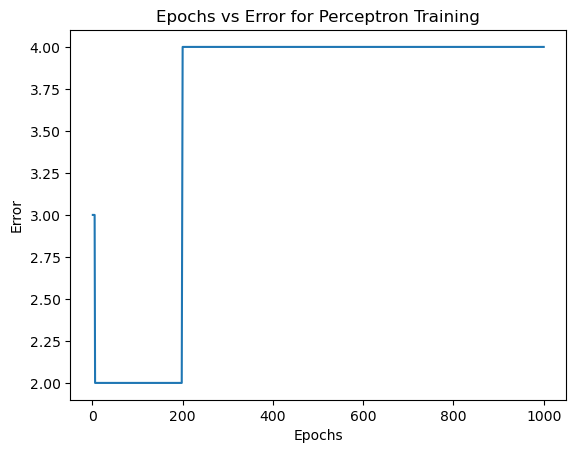

Final Weights (W0, W1): [1.00000000e-01 1.38777878e-17]
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


In [2]:
#A1(AND GATE)
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the AND gate
y = np.array([0, 0, 0, 1])

# Initialize weights and learning rate
W = np.array([10, 0.2])  # Two weights for two input features
learning_rate = 0.05

# Define the step activation function
def step_function(z):
    return 1 if z >= 0 else 0

# Function to calculate the sum-square-error
def calculate_error(X, y, W):
    error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(X[i], W))
        error += (y[i] - prediction) ** 2
    return error

# Training the perceptron
max_epochs = 1000  # Maximum number of epochs
error_values = []

for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(X[i], W))
        error = y[i] - prediction
        total_error += error ** 2
        W += learning_rate * error * X[i]
    error_values.append(total_error)

    # Check for convergence
    if total_error == 0:
        break

# Plot the epochs against the error values
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error for Perceptron Training')
plt.show()

# Print the final weights
print("Final Weights (W0, W1):", W)

# Test the perceptron with AND gate inputs
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in test_inputs:
    prediction = step_function(np.dot(input, W))
    print(f"Input: {input}, Prediction: {prediction}")


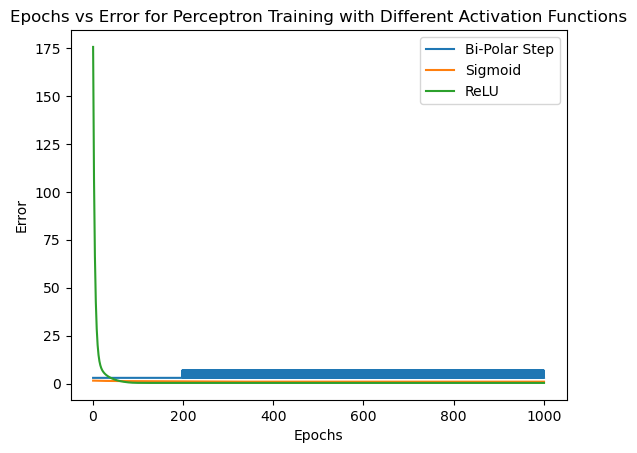

In [4]:
#A2(AND GATE)
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the AND gate
y = np.array([0, 0, 0, 1])

# Initialize weights and learning rate
W = np.array([10, 0.2])  # Two weights for two input features
learning_rate = 0.05

# Activation functions
def bipolar_step_function(z):
    return -1 if z < 0 else 1

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def relu_function(z):
    return max(0, z)

# Function to calculate the sum-square-error
def calculate_error(X, y, W, activation_function):
    error = 0
    for i in range(len(X)):
        prediction = activation_function(np.dot(X[i], W))
        error += (y[i] - prediction) ** 2
    return error

# Training the perceptron with different activation functions
max_epochs = 1000  # Maximum number of epochs
error_values = []

activation_functions = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

for activation_name, activation_function in activation_functions.items():
    W = np.array([10, 0.2])  # Reset weights for each activation function
    error_values = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            prediction = activation_function(np.dot(X[i], W))
            error = y[i] - prediction
            total_error += error ** 2
            W += learning_rate * error * X[i]
        error_values.append(total_error)

        # Check for convergence
        if total_error == 0:
            break

    # Plot the epochs against the error values for each activation function
    plt.plot(range(1, len(error_values) + 1), error_values, label=activation_name)

# Plot settings
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error for Perceptron Training with Different Activation Functions')
plt.legend()
plt.show()


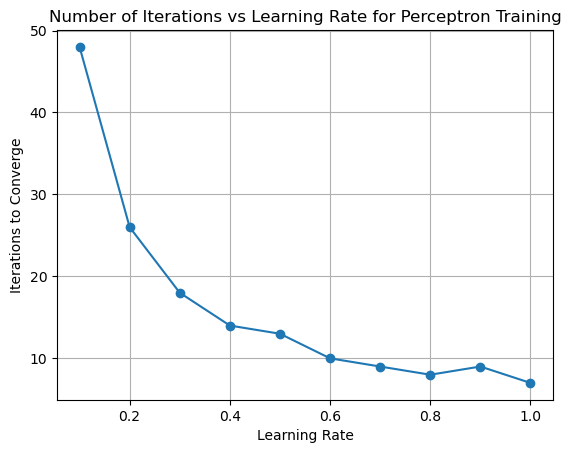

In [11]:
#A3(AND GATE)
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate with a bias term
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# Define the target values for the AND gate
y = np.array([0, 0, 0, 1])

# Initialize weights
W = np.array([10, 0.2, -0.75])  # Same initial weights as A1

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_to_converge = []

# Define the step activation function
def step_function(z):
    return 1 if z >= 0 else 0

# Function to train the perceptron and return the number of iterations needed to converge
def train_perceptron(X, y, W, learning_rate, max_epochs=1000):
    for epoch in range(max_epochs):
        converged = True
        for i in range(len(X)):
            prediction = step_function(np.dot(X[i], W))
            error = y[i] - prediction
            W += learning_rate * error * X[i]
            if error != 0:
                converged = False
        if converged:
            return epoch + 1  # Return the number of iterations to converge
    return -1  # Return -1 if it didn't converge within the maximum number of epochs

# Train the perceptron with different learning rates
for lr in learning_rates:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each learning rate
    iterations = train_perceptron(X, y, W, learning_rate=lr)
    iterations_to_converge.append(iterations)

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_to_converge, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Number of Iterations vs Learning Rate for Perceptron Training')
plt.grid(True)
plt.show()


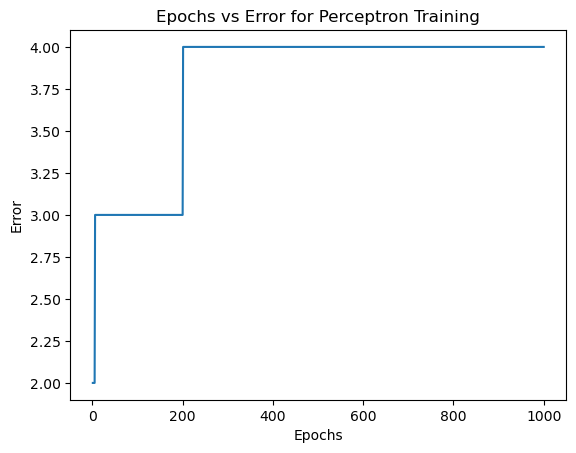

Final Weights (W0, W1): [-7.64666108e-15 -5.00000000e-02]
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


In [13]:
#A4(XOR GATE)
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the AND gate
y = np.array([0, 1, 1, 0])

# Initialize weights and learning rate
W = np.array([10, 0.2])  # Two weights for two input features
learning_rate = 0.05

# Define the step activation function
def step_function(z):
    return 1 if z >= 0 else 0

# Function to calculate the sum-square-error
def calculate_error(X, y, W):
    error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(X[i], W))
        error += (y[i] - prediction) ** 2
    return error

# Training the perceptron
max_epochs = 1000  # Maximum number of epochs
error_values = []

for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(X[i], W))
        error = y[i] - prediction
        total_error += error ** 2
        W += learning_rate * error * X[i]
    error_values.append(total_error)

    # Check for convergence
    if total_error == 0:
        break

# Plot the epochs against the error values
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error for Perceptron Training')
plt.show()

# Print the final weights
print("Final Weights (W0, W1):", W)

# Test the perceptron with AND gate inputs
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in test_inputs:
    prediction = step_function(np.dot(input, W))
    print(f"Input: {input}, Prediction: {prediction}")


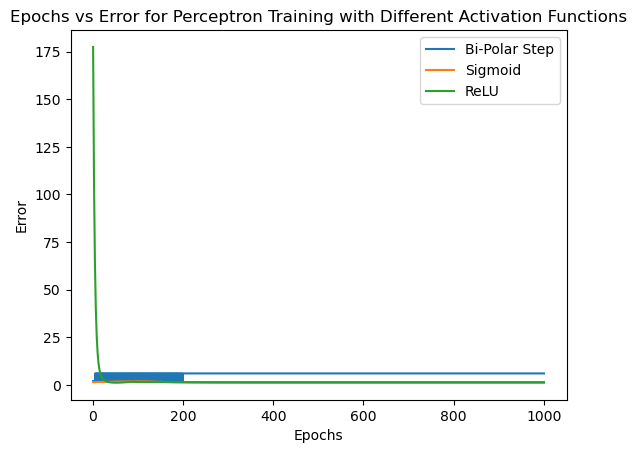

In [16]:
#A4(XOR GATE)
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the AND gate
y = np.array([0, 1,1, 0])

# Initialize weights and learning rate
W = np.array([10, 0.2])  # Two weights for two input features
learning_rate = 0.05

# Activation functions
def bipolar_step_function(z):
    return -1 if z < 0 else 1

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def relu_function(z):
    return max(0, z)

# Function to calculate the sum-square-error
def calculate_error(X, y, W, activation_function):
    error = 0
    for i in range(len(X)):
        prediction = activation_function(np.dot(X[i], W))
        error += (y[i] - prediction) ** 2
    return error

# Training the perceptron with different activation functions
max_epochs = 1000  # Maximum number of epochs
error_values = []

activation_functions = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

for activation_name, activation_function in activation_functions.items():
    W = np.array([10, 0.2])  # Reset weights for each activation function
    error_values = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            prediction = activation_function(np.dot(X[i], W))
            error = y[i] - prediction
            total_error += error ** 2
            W += learning_rate * error * X[i]
        error_values.append(total_error)

        # Check for convergence
        if total_error == 0:
            break

    # Plot the epochs against the error values for each activation function
    plt.plot(range(1, len(error_values) + 1), error_values, label=activation_name)

# Plot settings
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error for Perceptron Training with Different Activation Functions')
plt.legend()
plt.show()


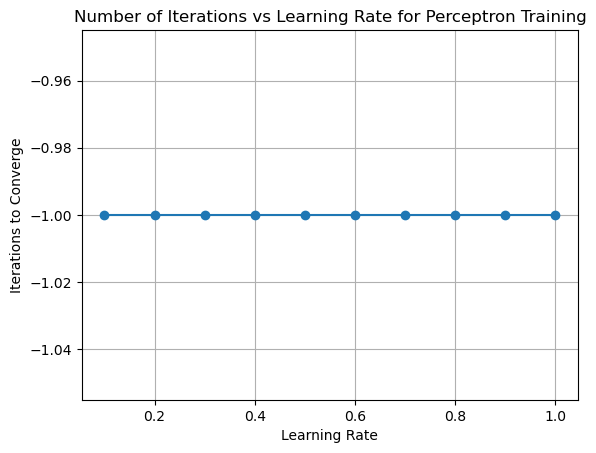

In [19]:
#A4(XOR GATE)
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate with a bias term
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# Define the target values for the AND gate
y = np.array([0, 1, 1, 0])

# Initialize weights
W = np.array([10, 0.2, -0.75])  # Same initial weights as A1

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_to_converge = []

# Define the step activation function
def step_function(z):
    return 1 if z >= 0 else 0

# Function to train the perceptron and return the number of iterations needed to converge
def train_perceptron(X, y, W, learning_rate, max_epochs=1000):
    for epoch in range(max_epochs):
        converged = True
        for i in range(len(X)):
            prediction = step_function(np.dot(X[i], W))
            error = y[i] - prediction
            W += learning_rate * error * X[i]
            if error != 0:
                converged = False
        if converged:
            return epoch + 1  # Return the number of iterations to converge
    return -1  # Return -1 if it didn't converge within the maximum number of epochs

# Train the perceptron with different learning rates
for lr in learning_rates:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each learning rate
    iterations = train_perceptron(X, y, W, learning_rate=lr)
    iterations_to_converge.append(iterations)

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_to_converge, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Number of Iterations vs Learning Rate for Perceptron Training')
plt.grid(True)
plt.show()


In [22]:
#A5
import numpy as np

# Define the input data (customer features)
customer_data = np.array([
     [20, 6, 2, 386],
    [16, 3,  6, 289],
    [27, 6,  2, 393],
    [19, 12,  2, 110],
    [24, 4, 2, 280],
    [22, 15,  5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 14, 4, 148],
    [16, 24, 4, 198]
])

# Define the target values (High Value Tx) where 1 represents "Yes" and 0 represents "No"
target_values = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and learning rate
np.random.seed(0)  # For reproducibility
weights = np.random.rand(customer_data.shape[1])  # Initialize weights randomly
learning_rate = 0.1

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to train the perceptron using gradient descent
def train_perceptron(X, y, weights, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(len(X)):
            input_data = X[i]
            target = y[i]
            predicted = sigmoid(np.dot(input_data, weights))
            error = target - predicted
            weights += learning_rate * error * predicted * (1 - predicted) * input_data
    return weights

# Train the perceptron
trained_weights = train_perceptron(customer_data, target_values, weights, learning_rate, epochs=10000)

# Test the perceptron with a sample input
sample_input = np.array([20, 6, 2, 386])
predicted_value = sigmoid(np.dot(sample_input, trained_weights))

# Define a threshold to classify as high or low value (you can adjust this threshold as needed)
threshold = 0.5
classification_result = "High Value" if predicted_value >= threshold else "Low Value"

print(f"Predicted Value: {predicted_value}")
print(f"Classification Result: {classification_result}")


Predicted Value: 1.0
Classification Result: High Value


In [24]:
#A6
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the input data (customer features)
customer_data = np.array([
     [20, 6, 2, 386],
    [16, 3,  6, 289],
    [27, 6,  2, 393],
    [19, 12,  2, 110],
    [24, 4, 2, 280],
    [22, 15,  5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 14, 4, 148],
    [16, 24, 4, 198]
])

# Define the target values (High Value Tx) where 1 represents "Yes" and 0 represents "No"
target_values = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the data
logistic_model.fit(customer_data, target_values)

# Predict using the trained model
predictions = logistic_model.predict(customer_data)

# Calculate accuracy
accuracy = accuracy_score(target_values, predictions)

print("Logistic Regression Accuracy:", accuracy)

# You can also print the coefficients and intercept
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print("Logistic Regression Coefficients:", coefficients)
print("Logistic Regression Intercept:", intercept)


Logistic Regression Accuracy: 1.0
Logistic Regression Coefficients: [[ 0.00218836 -0.04333286 -0.00412622  0.16475829]]
Logistic Regression Intercept: [-37.73945011]


In [26]:
#A7
import numpy as np

# Define the input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the AND gate
y = np.array([[0], [0], [0], [1]])

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1

# Initialize weights with random values
np.random.seed(0)  # For reproducibility
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Initialize biases with random values
biases_hidden = np.random.uniform(size=(1, hidden_size))
biases_output = np.random.uniform(size=(1, output_size))

# Set the learning rate and maximum number of iterations
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Training loop using backpropagation
for iteration in range(max_iterations):
    # Forward propagation
    hidden_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)
    
    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    output_output = sigmoid(output_input)
    
    # Calculate the error
    error = y - output_output
    
    # Check for convergence
    if np.abs(error).max() <= convergence_error:
        print(f"Converged after {iteration + 1} iterations.")
        break
    
    # Backpropagation
    d_output = error * sigmoid_derivative(output_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)
    
    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    biases_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the neural network with AND gate inputs
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in test_inputs:
    hidden_input = np.dot(input, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)
    
    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_input)
    
    print(f"Input: {input}, Predicted Output: {predicted_output[0]}")


Input: [0 0], Predicted Output: [0.26456296]
Input: [0 1], Predicted Output: [0.26242534]
Input: [1 0], Predicted Output: [0.2620649]
Input: [1 1], Predicted Output: [0.26055178]


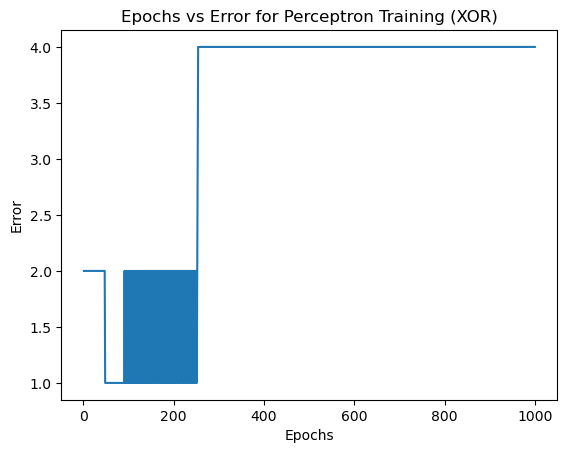

Final Weights (Bias, W1, W2): [ 0.1 -0.1 -0.1]
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the XOR gate
y = np.array([0, 1, 1, 0])

# Initialize weights and learning rate
W = np.array([10, 0.2, -0.75])  # Three weights for two input features and a bias term
learning_rate = 0.05

# Define the step activation function (1 if z >= 0 else 0)
def step_function(z):
    return 1 if z >= 0 else 0

# Function to calculate the sum-square-error
def calculate_error(X, y, W):
    error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(np.concatenate(([1], X[i])), W))
        error += (y[i] - prediction) ** 2
    return error

# Training the perceptron for XOR
max_epochs = 1000  # Maximum number of epochs
error_values = []

for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):
        prediction = step_function(np.dot(np.concatenate(([1], X[i])), W))
        error = y[i] - prediction
        total_error += error ** 2
        W += learning_rate * error * np.concatenate(([1], X[i]))
    error_values.append(total_error)

    # Check for convergence
    if total_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plot the epochs against the error values
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error for Perceptron Training (XOR)')
plt.show()

# Print the final weights
print("Final Weights (Bias, W1, W2):", W)

# Test the perceptron with XOR gate inputs
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in test_inputs:
    prediction = step_function(np.dot(np.concatenate(([1], input)), W))
    print(f"Input: {input}, Prediction: {prediction}")


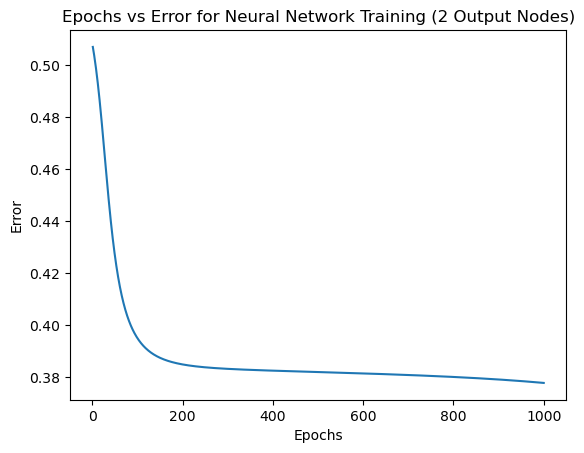

Final Weights (Hidden Layer):
[[0.38326802 0.91024833]
 [0.43015551 0.72602716]]
Final Weights (Output Layer):
[[ 0.12899061 -0.21419482]
 [-0.49487111  0.83829886]]
Input: [0 0], Predicted Output: [[0.74294157 0.24982202]]
Input: [0 1], Predicted Output: [[0.72774475 0.27548809]]
Input: [1 0], Predicted Output: [[0.72360138 0.28257486]]
Input: [1 1], Predicted Output: [[0.71206341 0.30259238]]


In [31]:
#A9
import numpy as np
import matplotlib.pyplot as plt

# Define the input data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target values for the AND gate
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Mapping 0 to [1, 0] and 1 to [0, 1]

# Initialize weights and learning rate
input_size = 2
output_size = 2
hidden_size = 2

# Initialize weights with random values
np.random.seed(0)  # For reproducibility
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Initialize biases with random values
biases_hidden = np.random.uniform(size=(1, hidden_size))
biases_output = np.random.uniform(size=(1, output_size))

# Learning rate and maximum number of iterations
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop using backpropagation
error_values = []

for iteration in range(max_iterations):
    # Forward propagation
    hidden_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    output_output = sigmoid(output_input)

    # Calculate the error
    error = y - output_output
    total_error = np.mean(np.abs(error))

    error_values.append(total_error)

    # Check for convergence
    if total_error <= convergence_error:
        print(f"Converged after {iteration + 1} iterations.")
        break

    # Backpropagation
    d_output = error * sigmoid_derivative(output_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    biases_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Plot the epochs against the error values
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error for Neural Network Training (2 Output Nodes)')
plt.show()

# Print the final weights
print("Final Weights (Hidden Layer):")
print(weights_input_hidden)
print("Final Weights (Output Layer):")
print(weights_hidden_output)

# Test the neural network with AND gate inputs
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for input in test_inputs:
    hidden_input = np.dot(input, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_input)

    print(f"Input: {input}, Predicted Output: {predicted_output}")


In [34]:
#A10
#AND GATE
from sklearn.neural_network import MLPClassifier

# Define the input data and target values for the AND gate
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Create an MLP classifier
clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=10000)

# Train the classifier
clf_and.fit(X_and, y_and)

# Test the classifier
test_inputs_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
predictions_and = clf_and.predict(test_inputs_and)

print("AND Gate Predictions:")
for i, input_data in enumerate(test_inputs_and):
    print(f"Input: {input_data}, Prediction: {predictions_and[i]}")


AND Gate Predictions:
Input: [0, 0], Prediction: 0
Input: [0, 1], Prediction: 0
Input: [1, 0], Prediction: 0
Input: [1, 1], Prediction: 0


In [36]:
#A10
#XOR GATE
# Define the input data and target values for the XOR gate
X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor = [0, 1, 1, 0]

# Create an MLP classifier
clf_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=10000)

# Train the classifier
clf_xor.fit(X_xor, y_xor)

# Test the classifier
test_inputs_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
predictions_xor = clf_xor.predict(test_inputs_xor)

print("XOR Gate Predictions:")
for i, input_data in enumerate(test_inputs_xor):
    print(f"Input: {input_data}, Prediction: {predictions_xor[i]}")


XOR Gate Predictions:
Input: [0, 0], Prediction: 0
Input: [0, 1], Prediction: 0
Input: [1, 0], Prediction: 1
Input: [1, 1], Prediction: 1


In [40]:
#A11
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

data = pd.read_csv('SolarPredictionfinal.csv')

label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])

feature_columns = ["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]

num_features = ["Temperature", "Pressure", "Humidity"]
num_bins = 5 
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
data[num_features] = discretizer.fit_transform(data[num_features])

target_bins = 3  
data["Radiation"] = pd.cut(data["Radiation"], bins=target_bins, labels=False)

X = data[feature_columns]
y = data["Radiation"]
X = data.drop(columns=['Radiation'])  # Features
y_regression = data['Radiation']  # Regression target

# Split the data into training and testing sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Create and train an MLP regressor for the regression task
regressor = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', max_iter=1000, random_state=42)
regressor.fit(X_train, y_train)

# Predict radiation values (regression)
y_pred_regression = regressor.predict(X_test)

# Define a threshold for binning the values (you can adjust this threshold)
threshold = 0.5

# Convert regression predictions to binary classes (e.g., 0 and 1)
y_pred_classification = [1 if value >= threshold else 0 for value in y_pred_regression]

# Now, you have the classification predictions for "Radiation"
# Assuming you have actual classification target values in 'y_classification'
# For demonstration, let's assume y_classification is available
# Replace 'y_classification' with your actual classification target values


# Evaluate the classification accuracy using y_test
accuracy = accuracy_score(y_test, y_pred_classification)
print(f"Classification Accuracy: {accuracy}")



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Classification Accuracy: 0.8227286631997552
